1. Pick one of the company data files and build your own classifier. 

2. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

3. Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
%matplotlib inline

In [119]:
yelp_raw = pd.read_csv('yelp_labelled.txt', sep='\t', header=None, names=['reviews', 'boolean'])
yelp_raw.head()

,reviews,boolean
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


In [120]:
yelp_raw.describe(include='all')

,reviews,boolean
count,1000,1000.00000
unique,996,NaN
top,I love this place.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


In [121]:
yelp_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
reviews    1000 non-null object
boolean    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


pd.set_option('display.max_columns',1000)

In [123]:
yelp_raw['reviews'].astype('str')

0                                                                                                                                   Wow... Loved this place.
1                                                                                                                                         Crust is not good.
2                                                                                                                  Not tasty and the texture was just nasty.
3                                                                    Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
4                                                                                                The selection on the menu was great and so were the prices.
5                                                                                                             Now I am getting angry and I want my damn pho.
6                                                         

In [124]:
keywords = ['love', 'good', 'ever', 'great', 'well', 'like', 'recommended', 'delicious', 'amazing', 'performed', 'back', 'friendly', 'exellent']

for key in keywords:
    yelp_raw[str(key)] = yelp_raw.reviews.str.contains(str(key), case=False) & ~yelp_raw.reviews.str.contains('not', case=False) & ~yelp_raw.reviews.str.contains('worst', case=False)

pd.set_option('display.max_colwidth',1000)

In [126]:
yelp_raw

,reviews,boolean,love,good,ever,great,well,like,recommended,delicious,amazing,performed,back,friendly,exellent
0,Wow... Loved this place.,1,True,False,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,True,False,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so were the prices.,1,False,False,False,True,False,False,False,False,False,False,False,False,False
5,Now I am getting angry and I want my damn pho.,0,False,False,False,False,False,False,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,False,False,False,False,False,False,False,False
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0,False,False,False,False,False,True,False,False,False,False,False,False,False
8,The fries were great too.,1,False,False,False,True,False,False,False,False,False,False,False,False,False
9,A great touch.,1,False,False,False,True,False,False,False,False,False,False,False,False,False


In [127]:
yelp_corr = yelp_raw.corr()

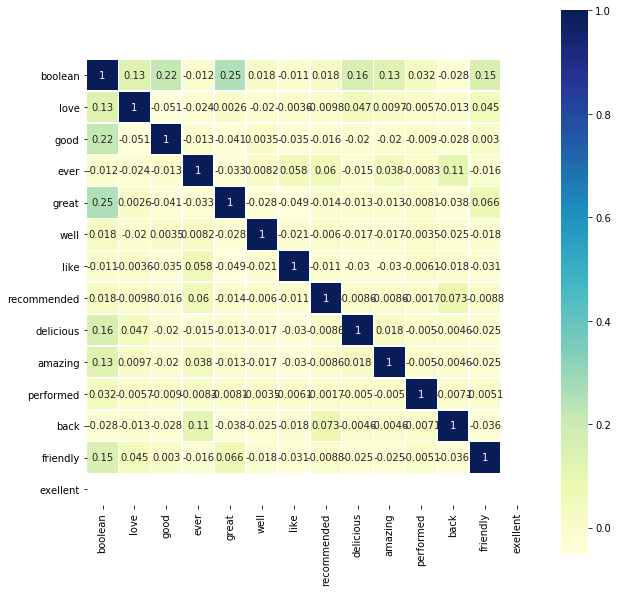

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(yelp_corr, square=True, linewidths=0.5, annot=True, cmap='YlGnBu')
plt.show()

In [129]:
yelp_raw.drop('reviews', axis=1, inplace=True)

In [130]:
yelp_raw.head()

,boolean,love,good,ever,great,well,like,recommended,delicious,amazing,performed,back,friendly,exellent
0,1,True,False,False,False,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,True,False,False,False,False,False,False,False,False,False,False,False,False
4,1,False,False,False,True,False,False,False,False,False,False,False,False,False


In [131]:
data = yelp_raw[keywords]
target = yelp_raw['boolean']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 308
